In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier

In [7]:
data=pd.read_csv('../Phase_1_data/avocado.csv')

In [8]:
print('Data Shape:',data.shape)

Data Shape: (18249, 14)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [10]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


C:\Users\kulsr\AppData\Local\Temp\ipykernel_25256\2571285359.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=data, x='AveragePrice',fill=True,  palette='Set2')


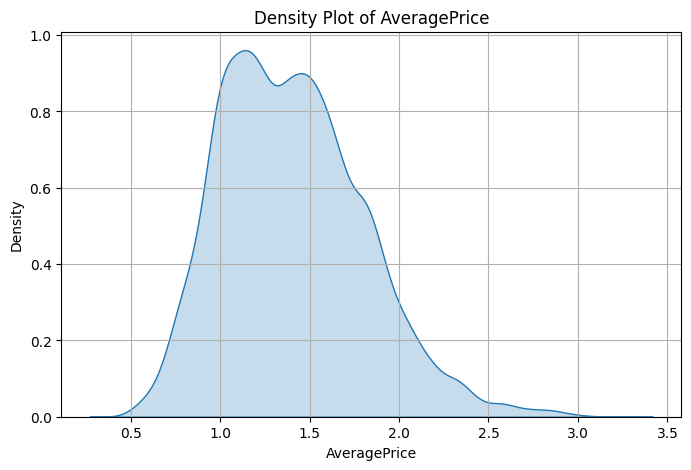

In [15]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data, x='AveragePrice',fill=True,  palette='Set2')
plt.title('Density Plot of AveragePrice')
plt.xlabel('AveragePrice')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [13]:
data['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

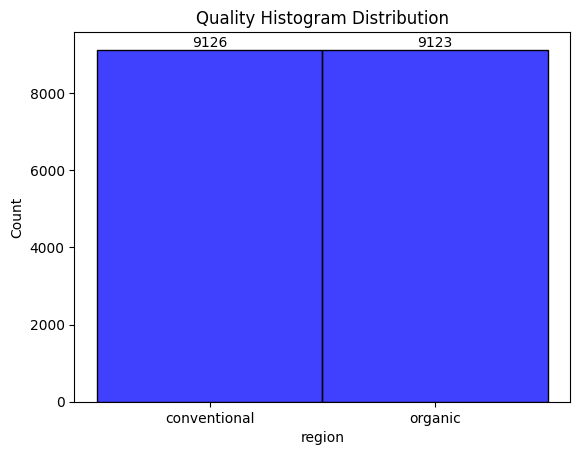

In [14]:
ax = sns.histplot(x=data['type'], color='blue')
labels = [str(v) if v else '' for v in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], labels=labels)
plt.xlabel('region')
plt.title('Quality Histogram Distribution')
plt.show()

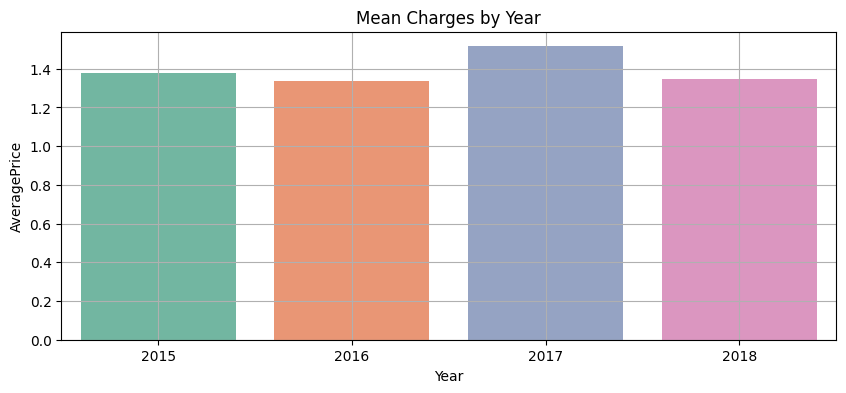

In [21]:
mean_charges = data.groupby(['year'])['AveragePrice'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 4))
sns.barplot(data=mean_charges, x='year', y='AveragePrice', palette='Set2')
plt.title('Mean Charges by Year')
plt.xlabel('Year')
plt.ylabel('AveragePrice')
plt.grid(True)
plt.show()

In [24]:
label_encoder_type= preprocessing.LabelEncoder() 
label_encoder_region= preprocessing.LabelEncoder() 

data['region']= label_encoder_region.fit_transform(data['region']) 
data['type']= label_encoder_type.fit_transform(data['type']) 


## Regression Model

In [25]:
print('Data before Outlier Detection ',data.shape)
Q1 = data['AveragePrice'].quantile(0.25)
Q3 = data['AveragePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['AveragePrice'] >= lower_bound) & (data['AveragePrice'] <= upper_bound)]
print('Data After Outlier Detection ',data.shape)


Data before Outlier Detection  (18249, 14)
Data After Outlier Detection  (18040, 14)


## Feature Selection

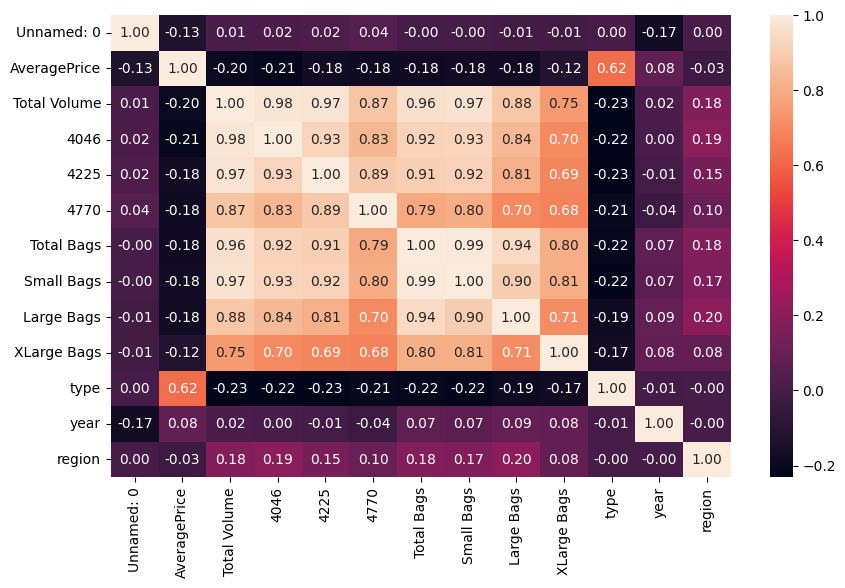

In [26]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(data=data.corr(), annot=True, fmt='.2f')

In [32]:
data_reg=data.drop(columns=['region', 'year', 'Date','Unnamed: 0'],axis=1).copy()

In [33]:
data_reg.isna().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
dtype: int64

In [34]:
data_reg.duplicated().sum()

0

In [35]:
X = data_reg.drop('AveragePrice', axis = 1)
y = data_reg['AveragePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=17)

## Taining a Model

In [36]:
def plot_results(test, pred, model_name):
    fig, ax = plt.subplots(figsize=(15, 4))
    x_axis = np.arange(0, test.shape[0], 1)
    sns.lineplot(y=test, x=x_axis, label='Actual', color='mediumblue')
    sns.lineplot(y=pred, x=x_axis, label='Predicted', color='red')
    ax.set(xlabel="Values", ylabel="Target", title=f"{model_name}_Actual_vs_Prediction")
    ax.legend()
    sns.despine()
    plt.show()

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluation_fn(best_model, X_test_scaled, Y_test, model_name, save_plot=False):
    # Evaluate the model on the test set
    y_pred = best_model.predict(X_test_scaled)
    
    # Calculate regression metrics
    mae = mean_absolute_error(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    rmse = mean_squared_error(Y_test, y_pred, squared=False)
    r2 = r2_score(Y_test, y_pred)
    
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'R-squared (R²): {r2:.2f}')
    
    # Call plotting functions
    plot_results(Y_test, y_pred, model_name)

C:\Users\kulsr\anaconda3\envs\xgboost\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.18
R-squared (R²): 0.78


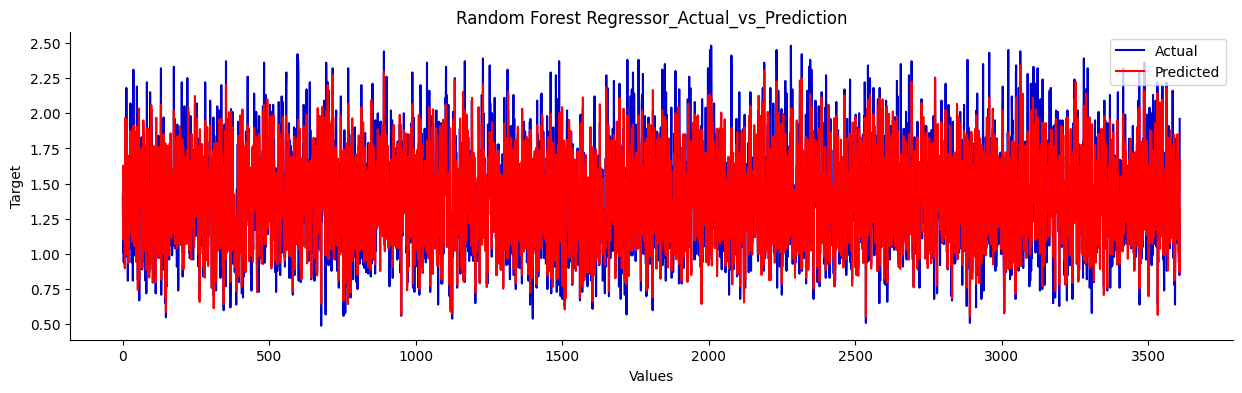

In [42]:
# Model
model = RandomForestRegressor(random_state=19)
model.fit(X_train, Y_train)

# Evaluation
evaluation_fn(model, X_test, Y_test,'Random Forest Regressor')

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [80,100,150,180, 200,],
    'max_depth': [6,8, 10, 12,14],
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=19)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, Y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model for evaluation


Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Parameters: {'max_depth': 14, 'n_estimators': 200}


C:\Users\kulsr\anaconda3\envs\xgboost\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.18
R-squared (R²): 0.77


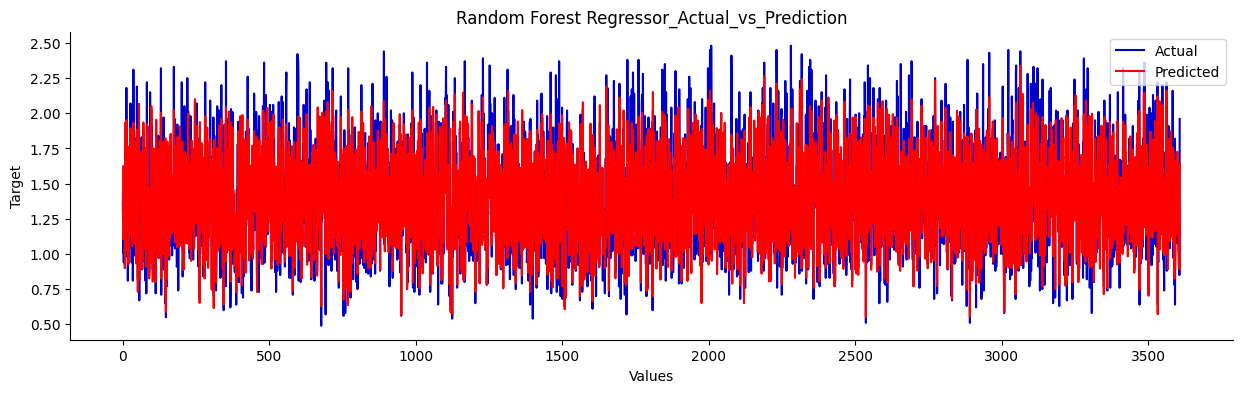

In [44]:
best_rf_model = grid_search.best_estimator_
evaluation_fn(best_rf_model, X_test, Y_test, 'Random Forest Regressor')


# Classification Model

In [46]:
data_class=data.drop(columns=['year', 'AveragePrice', 'Date','Unnamed: 0'],axis=1).copy()

In [48]:
X = data_class.drop('region', axis = 1)
y = data_class['region']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=17)

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluation_fn(best_model, X_test, Y_test):
    
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted')

    print('Accuracy of the model is:', accuracy)
    print('Precision of the model is:', precision)
    print('Recall of the model is:', recall)
    print('F1 score of the model is:', f1)


In [52]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)
evaluation_fn(model,X_test,Y_test)

Accuracy of the model is: 0.7763303769401331
Precision of the model is: 0.7793010357348146
Recall of the model is: 0.7763303769401331
F1 score of the model is: 0.7764890263622924


In [53]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)
evaluation_fn(model,X_test,Y_test)

Accuracy of the model is: 0.8655764966740577
Precision of the model is: 0.8680686473560377
Recall of the model is: 0.8655764966740577
F1 score of the model is: 0.865053824978798
